Part 1: 

●	Load the data using Python Pandas library.

●	Do Exploratory Data Analysis of the data and state your insights.

Part 2: 

●	Perform All the assumptions for Linear Regression and give your inference.

●	Build the base model. 

●	Perform some techniques to get best features and give the best features to build a model to get best adjusted R squared value.

●	Provide the inferences for various methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import sequential_feature_selector
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [3]:
#  Load the data using Python Pandas library.
df = pd.read_csv("car-mpg.csv")
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#  Do Exploratory Data Analysis of the data and state your insights.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df = df.drop(['car_name'],axis=1)

In [7]:
df.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df.hp.replace("?", np.nan, inplace=True)

In [9]:
df.hp[df.hp.dropna()].describe()

count     0
unique    0
Name: hp, dtype: int64

In [10]:
a=df.hp.dropna()
a=a.astype(int)
a.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: hp, dtype: float64

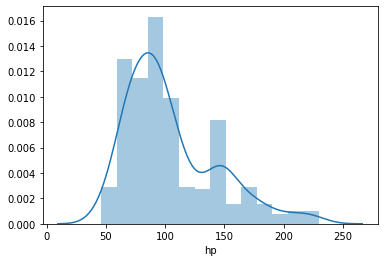

In [11]:
sns.distplot(a)

In [12]:
df.hp.fillna(df.hp.median(),inplace=True)

In [13]:
df.hp=df.hp.astype(int)

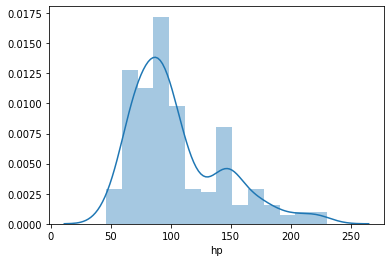

In [14]:
sns.distplot(df.hp)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null int32
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [16]:
df.yr.value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

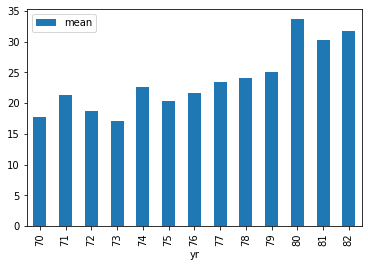

In [17]:
df.groupby('yr')['mpg'].agg(['mean']).plot.bar()

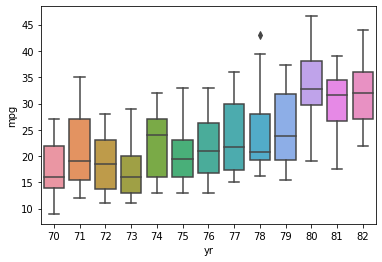

In [18]:
sns.boxplot(x='yr',y='mpg',data=df)
plt.show()

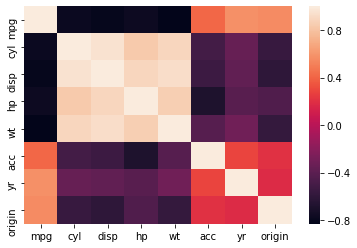

In [19]:
sns.heatmap(df.corr())

In [20]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.296482,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.224809,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


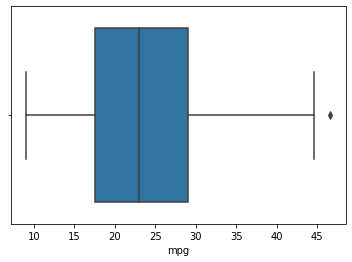

In [21]:
sns.boxplot(df.mpg)

In [22]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[df_in[col_name] < fence_high]
    return df_out

In [23]:
df=remove_outlier(df,'mpg')

In [24]:
df.mpg.isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 8 columns):
mpg       397 non-null float64
cyl       397 non-null int64
disp      397 non-null float64
hp        397 non-null int32
wt        397 non-null int64
acc       397 non-null float64
yr        397 non-null int64
origin    397 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 26.4 KB


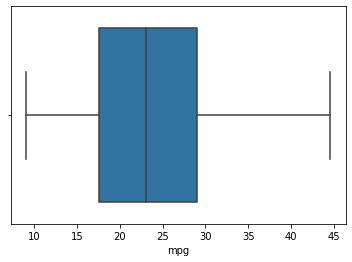

In [26]:
sns.boxplot(df.mpg)

In [28]:
# Linear regression

y=df['mpg']
X=df.drop(['mpg'],axis=1)

In [29]:
lin_reg=LinearRegression()#calling object of linear reg function
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.4379542   0.0186813  -0.01220722 -0.00665821  0.08951422  0.74802882
  1.34075638]
Intercept: -17.05224824077596
R^2 score: 0.8241322463356788


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("train data R square:",lin_reg.score(X_train,y_train))
print("test data R square:",lin_reg.score(X_test,y_test))

train data R square: 0.8219874135700802
test data R square: 0.8264635239131832


Inference: Based on the R2 obtained in the model, the performance is similar for train and test. So, there might not be an overfitting problem.

In [33]:
# Assumption 1- No autocorrelation

Xc=sm.add_constant(X)
lin_reg=sm.OLS(y,Xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.4
Date:                Thu, 24 Oct 2019   Prob (F-statistic):          1.55e-142
Time:                        22:37:46   Log-Likelihood:                -1030.2
No. Observations:                 397   AIC:                             2076.
Df Residuals:                     389   BIC:                             2108.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0522      4.523     -3.770      0.000     -25.946      -8.159
cyl           -0.4380      0.316     -1.386      0.167      -1.059       0.183
disp           0.0187      0.007      2.533      0.012       0.004       0.033
hp            -0.0122      0.013     -0.923      0.357      -0.038       0.014
wt            -0.0067      0.001    -10.534      0.000      -0.008      -0.005
acc            0.0895      0.095      0.939      0.348      -0.098       0.277
yr             0.7480      0.050     15.079      0.000       0.650       0.846
origin         1.3408      0.272      4.937      0.000       0.807       1.875
==============================================================================
Omnibus:                       23.644   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.149
Skew:                           0.440   Prob(JB):                     2.33e-08
Kurtosis:                       4.161   Cond. No.                     8.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

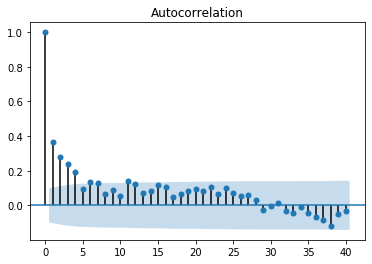

In [34]:
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40,alpha=0.05)

Inference:  Durbin- Watson Test.

- It's value ranges from 0-4. 
- If the value is between 0-2, it's known as Positive Autocorrelation.
- If the value ranges from 2-4, it is known as Negative autocorrelation.
- If the value is exactly 2, it means No Autocorrelation.
- For a good linear model, it should have low or no autocorrelation.

We can see here that the values of Durbin Watson test (test for normality) is 1.259 (POSITIVE AUTO-CORRELATION)
    
From the graph, we can easily see that there is somewhat Positive autocorrelation.

In [35]:
# Assumption 2- Normality of Residuals

print(stats.jarque_bera(lin_reg.resid))

(35.148970805742294, 2.330762205460246e-08)


The Jarque Bera test shows the JB value and the p-value for the hypothesis testing.
The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected.

In this case the computed value of the JB value 35.14 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

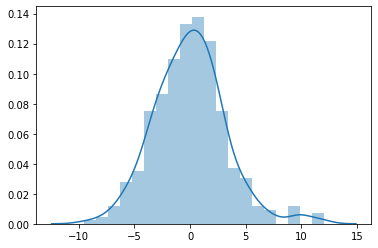

In [36]:
sns.distplot(lin_reg.resid)

Inference:
For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

### Asssumption 3 - Linearity of residuals

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals.
Or we can go for rainbow test. Let's look both of them one by one.


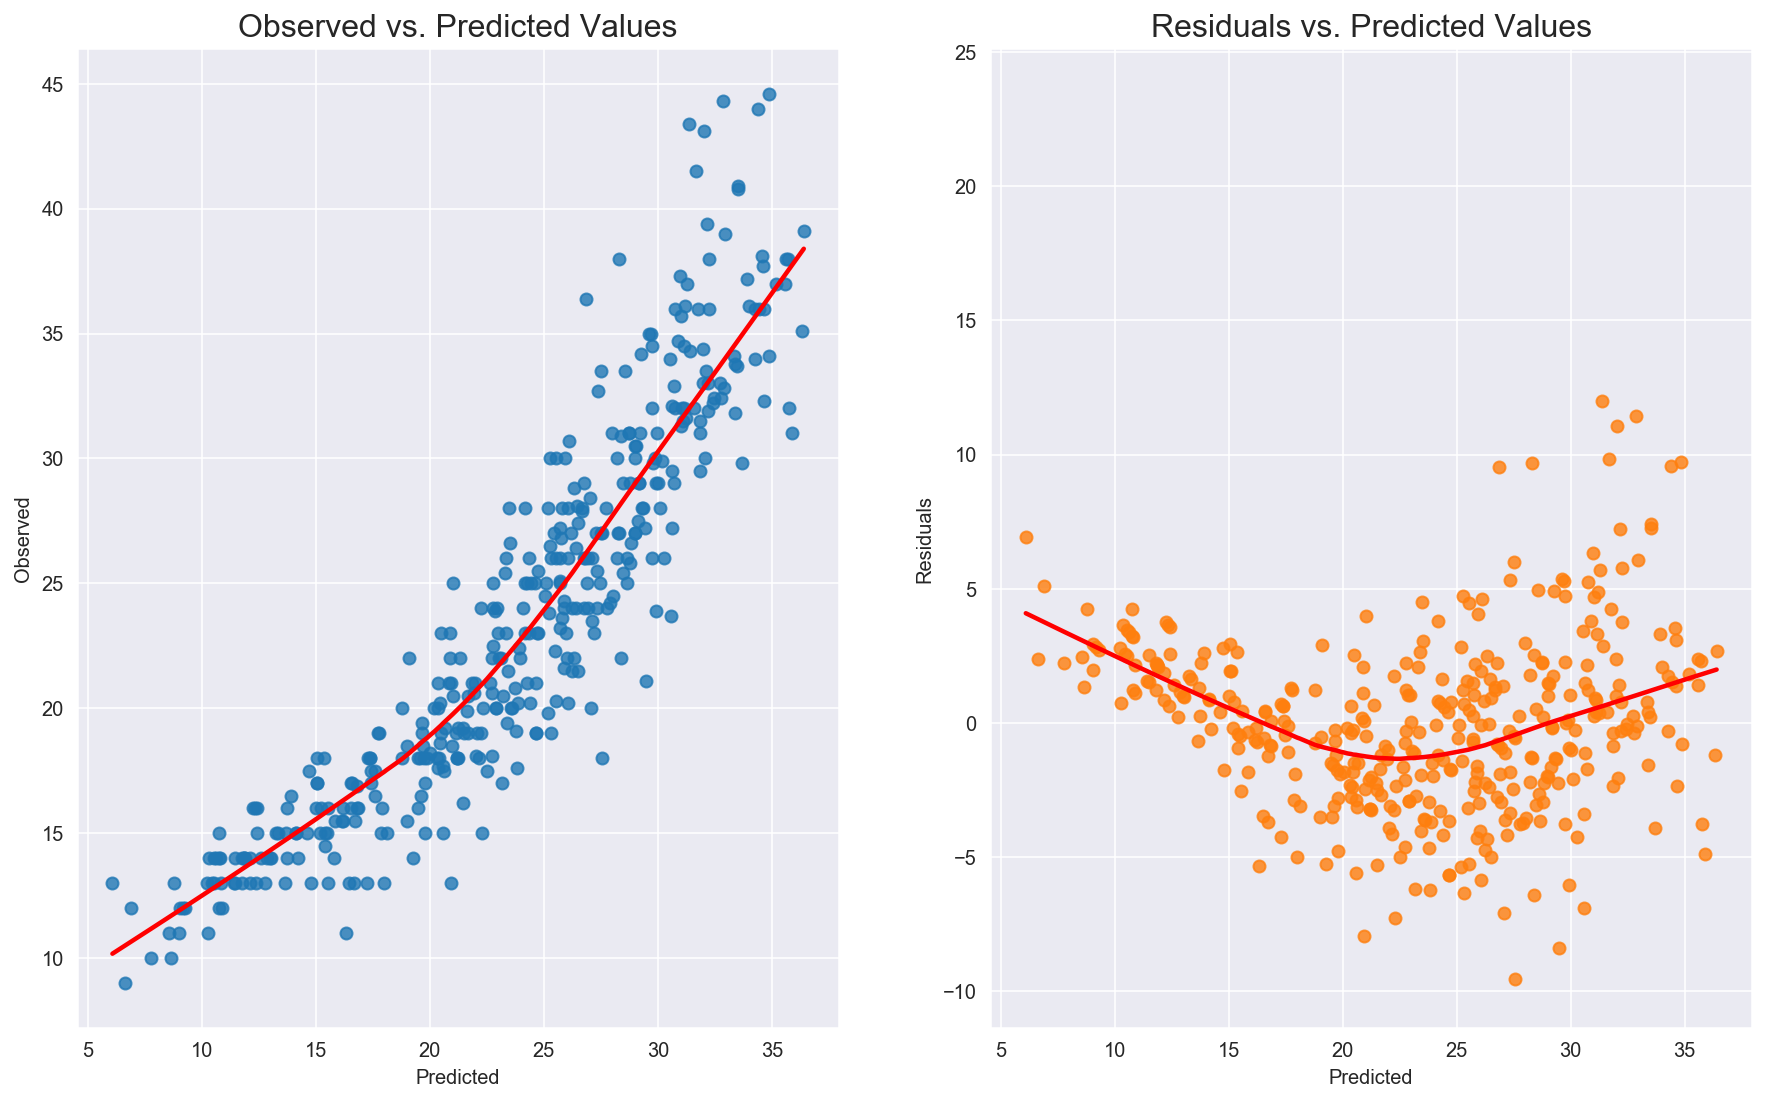

In [37]:

%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

Inference: 
    
To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or 
around horizontal line in the latter one. 
In both cases linearity of residuals can be seen.

### Rainbow test 
- It is done to check the linearity of the residuals for a linear regression model. Linearity of residuals is preferred.


In [38]:

sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(1.6785647190343156, 0.00017304637828732575)

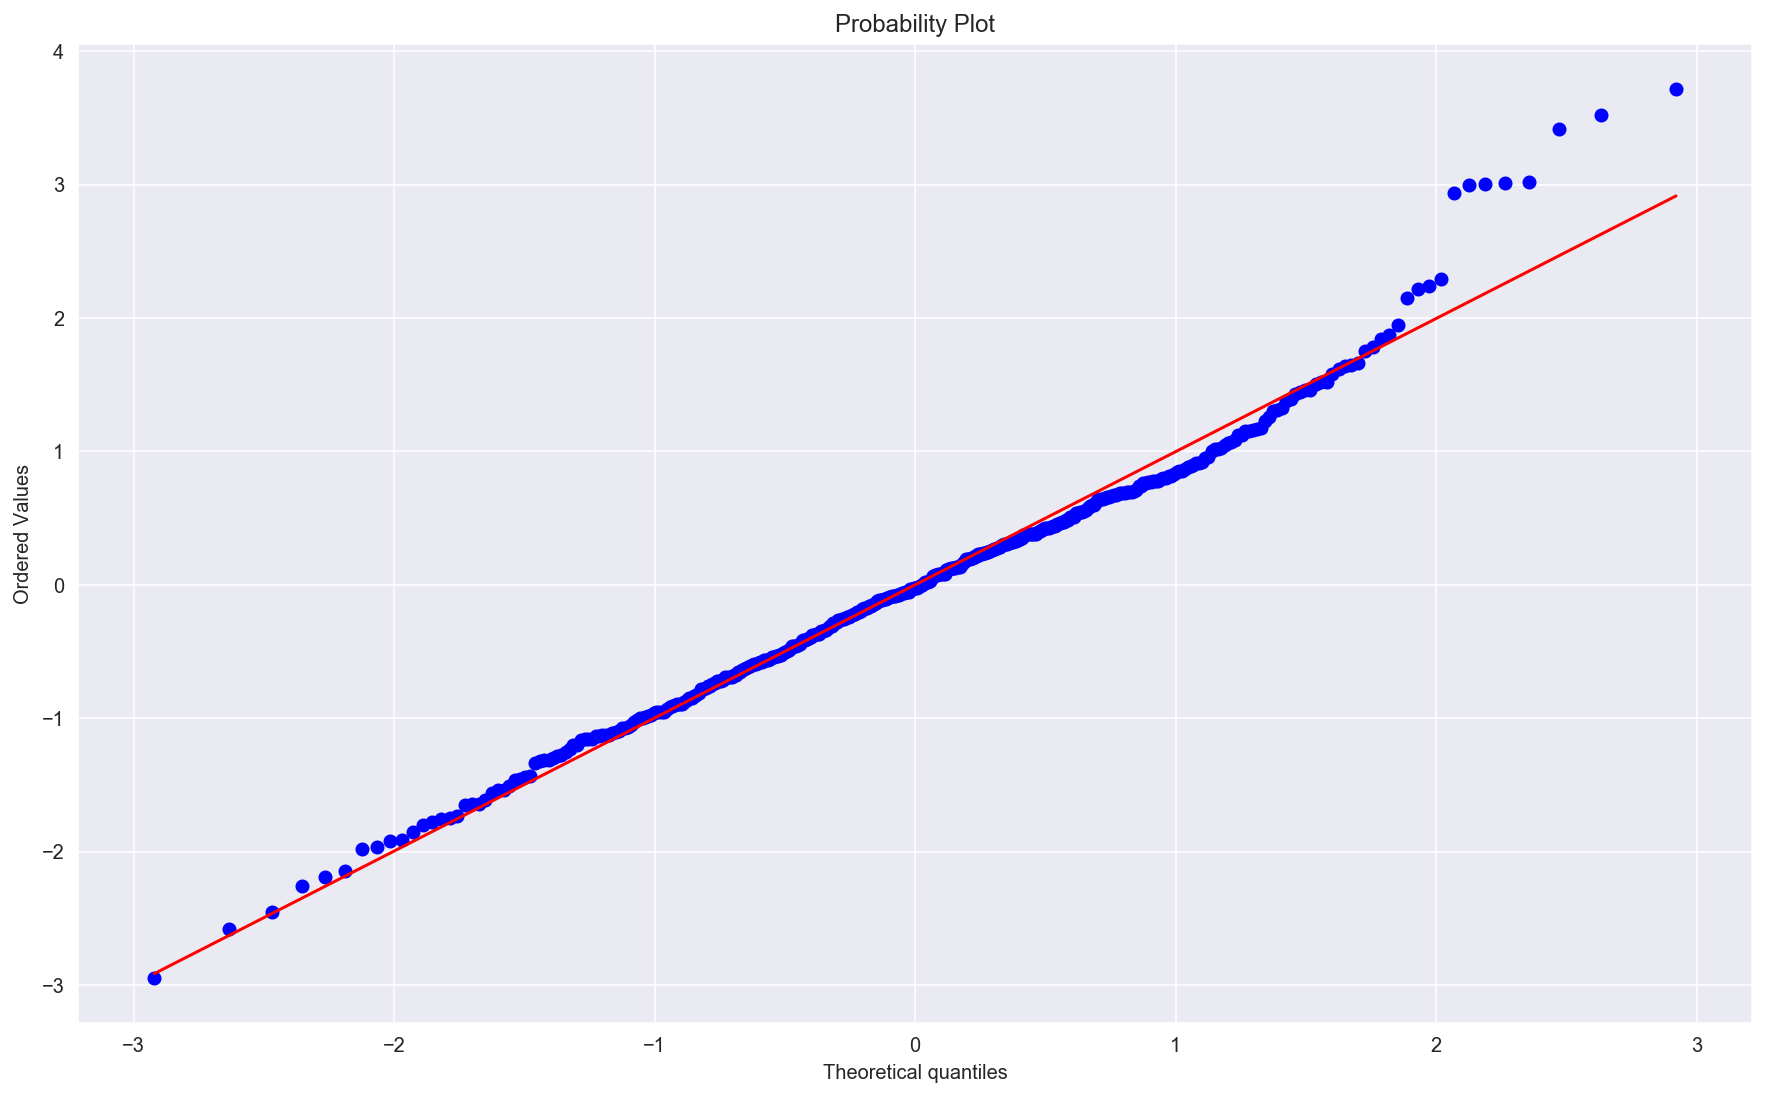

In [39]:
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [40]:
lin_reg.resid.mean()

-6.760447225818233e-13

Inference: The mean value of the residuals is very much close to zero. -6.76 * 10^(-13)

So, linearity is present.

### Assumption 4 - Homoscedasticity test(using goldfeld test) 

Homoscedacity : If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
Heteroscedacity : If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.


[('F statistic', 2.198893573366795), ('p-value', 4.054178338151619e-08)]

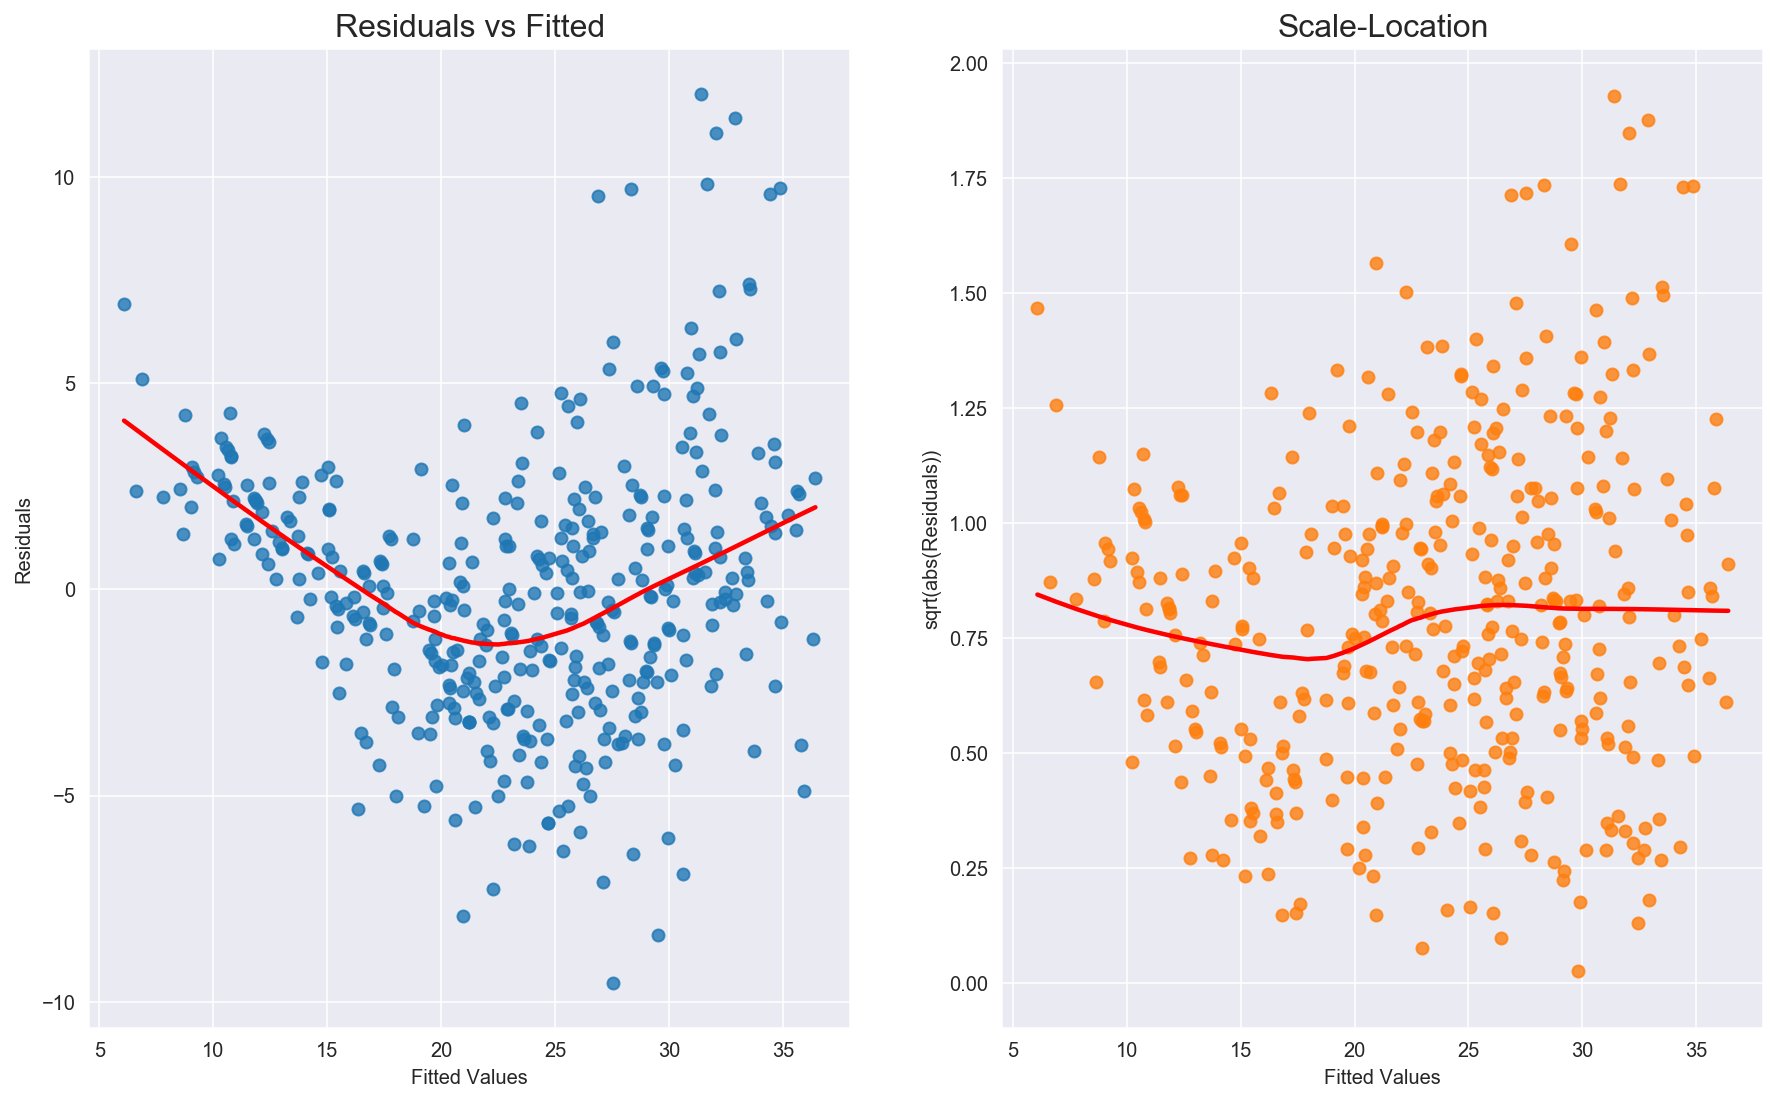

In [41]:

from statsmodels.compat import lzip
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

#### Assumption 5- No multi collinearity

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [42]:
vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,cyl,disp,hp,wt,acc,yr,origin
vif,10.679037,21.841411,9.442353,10.580052,2.552098,1.242007,1.742405


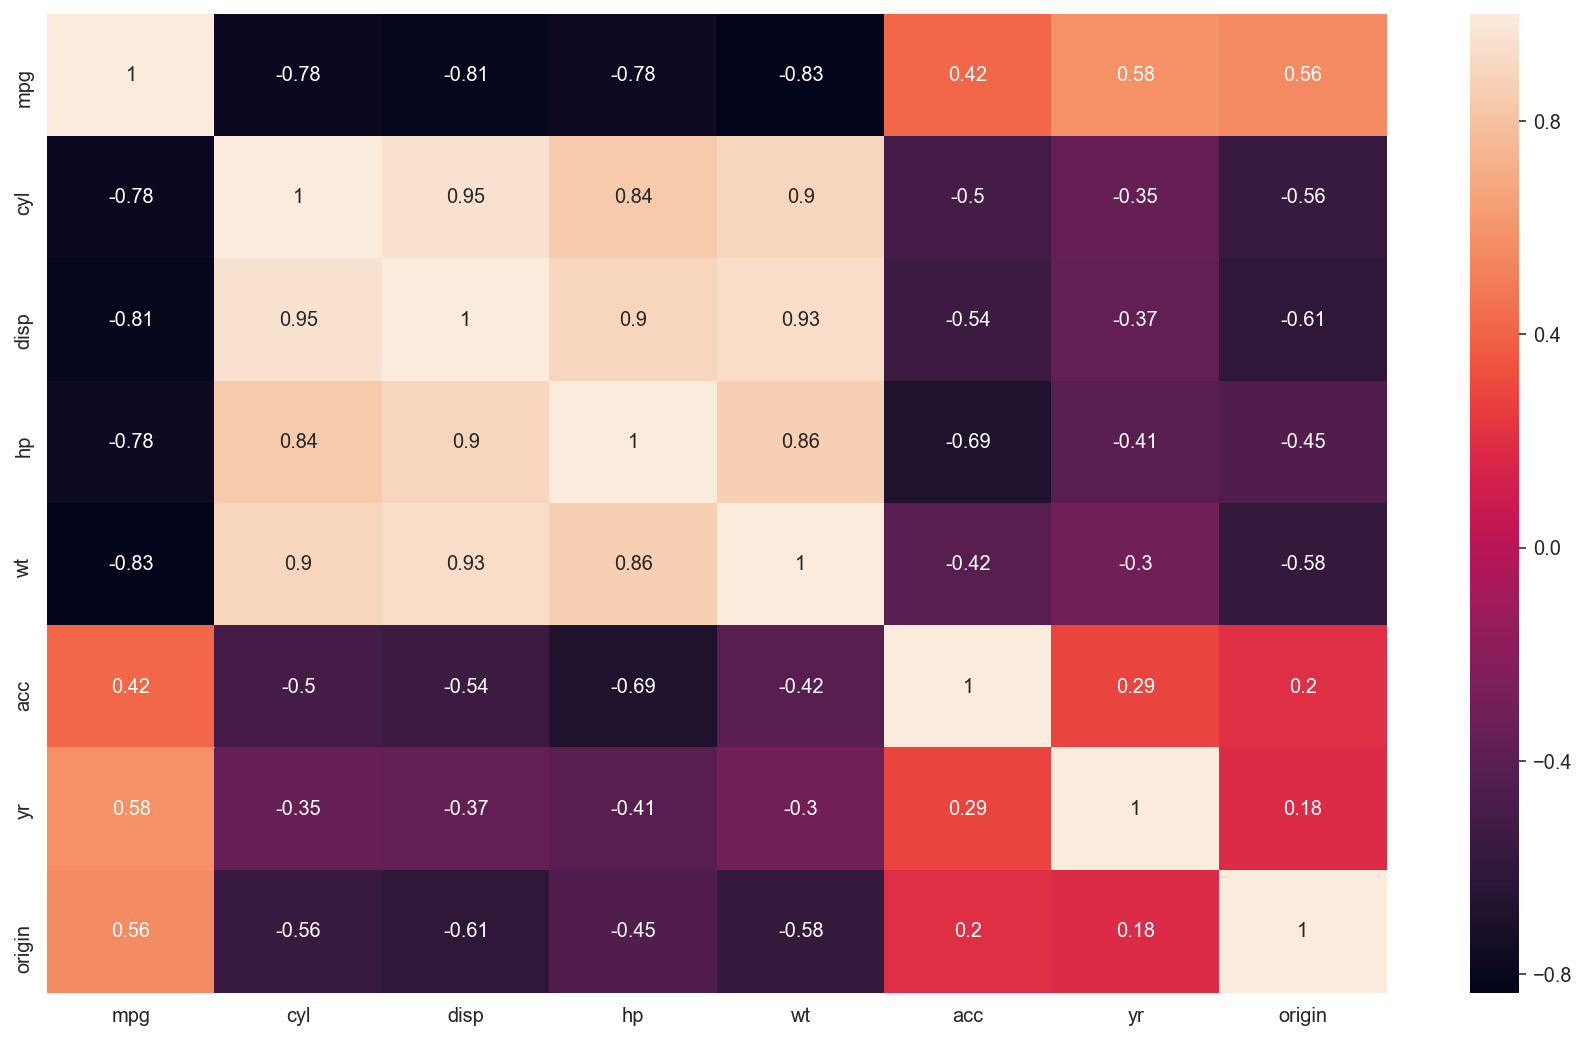

In [43]:
sns.heatmap(df.corr(), annot=True)

Inference: Multicollinearity exists. This vif column has be built with the help of X_constant and not the X_values. Because we built our model by adding Constant.

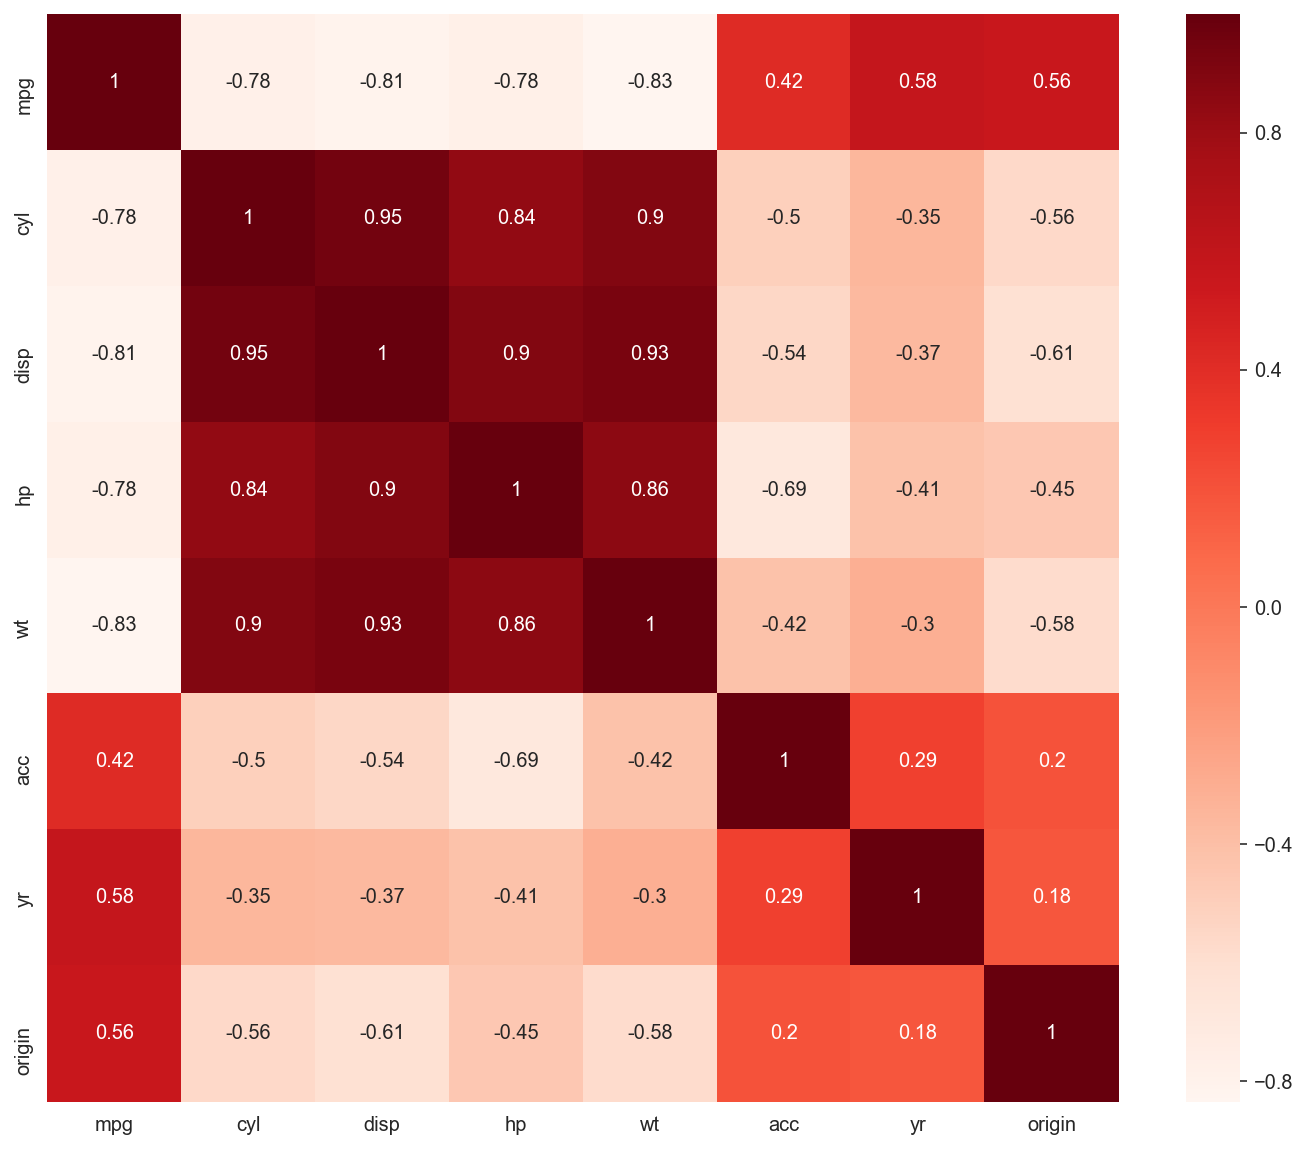

In [45]:
# Perform All the various feature selection techniques.

# 1.Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
cor_target = abs(cor["mpg"])      #Correlation with output variable
relevant_features = cor_target[cor_target>0.5]    #Selecting highly correlated features
relevant_features

mpg       1.000000
cyl       0.778350
disp      0.806521
hp        0.775468
wt        0.834482
yr        0.578468
origin    0.558579
Name: mpg, dtype: float64

In [48]:
# 2. Backward elimination

X_1 = sm.add_constant(X)     #Adding constant column of ones, mandatory for sm.OLS model
model = sm.OLS(y,X_1).fit()  #Fitting sm.OLS model

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['wt', 'yr', 'origin']


In [98]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.8583944686526472


In [97]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.8680585117543534
